# Car Price Prediction
This notebook demonstrates car price prediction using the `Cardetails.csv` dataset. It includes steps like data preprocessing, model training, and evaluation.

In [1]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import pickle


In [2]:

df = pd.read_csv('Cardetails.csv')
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:

# Handle missing values for numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df.isnull().sum()


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats              0
dtype: int64

In [7]:

# Clean columns
for col, regex, dtype in [
    ('mileage',   r'(\d+\.\d+)', float),
    ('engine',    r'(\d+)',       float),
    ('max_power', r'(\d+\.\d+)', float),
]:
    if df[col].dtype == object:
        df[col] = df[col].str.extract(regex).astype(dtype)
df[['mileage','engine','max_power']].dtypes


mileage      float64
engine       float64
max_power    float64
dtype: object

In [9]:

# Encode categorical features
df['fuel'] = df['fuel'].map({'Diesel':1,'Petrol':2,'LPG':3,'CNG':4})
df['seller_type'] = df['seller_type'].map({'Individual':1,'Dealer':2,'Trustmark Dealer':3})
df['transmission'] = df['transmission'].map({'Manual':1,'Automatic':2})
df['owner'] = df['owner'].map({'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5})


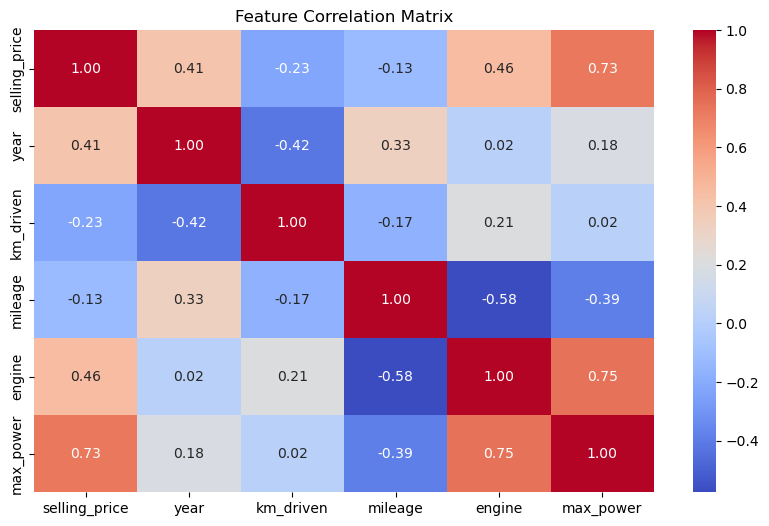

In [11]:

plt.figure(figsize=(10,6))
corr = df[['selling_price','year','km_driven','mileage','engine','max_power']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()


In [17]:

# Features and target
# Define features (X) and target (y)
X = df[['year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power']]
y = df['selling_price']

# 1. Impute missing values in X by filling with column means
print("Missing values before imputation:\n", X.isnull().sum())
X = X.fillna(X.mean())
print("Missing values after imputation:\n", X.isnull().sum())

# 2. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2   = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")



Missing values before imputation:
 year               0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power       3129
dtype: int64
Missing values after imputation:
 year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
dtype: int64
MAE:  285532.40
MSE:  280983244313.15
RMSE: 530078.53
R²:   0.571


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:

with open('model.pkl','wb') as f:
    pickle.dump(model, f)
print("Model saved as model.pkl")


Model saved as model.pkl
